In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean

# We will use a library that I created for you
import os # To import external python files
import sys# To import external python files
sys.path.insert(0,os.path.abspath('../../course_library') ) # Replace this
                                                            # with the correct
                                                            # path



from andrea_models import AndreaLinearRegression # In the course library

ModuleNotFoundError: ignored

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/02.regression/a.regression.ipynb)

In [0]:
dataset_to_use = 'A'
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.csv"
!wget(mydatasets_folder+"/"+filename)
df = pd.read_csv(filename)

In [0]:
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,...,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,...,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056,34178,192.168.1.190,74.125.155.201,TCP,16,23,...,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377,36821,192.168.1.190,172.217.135.40,0,0,0,...,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900,104389,192.168.1.190,173.194.184.103,QUIC,9,77,...,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599


In [0]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
RelativeTime           float64
PacketsSent            int64
PacketsReceived        int64
BytesSent              int64
BytesReceived          int64
IPSrc0                 object
IPDst0                 object
Protocol0              object
PacketsSent0           int64
PacketsReceived0       int64
BytesSent0             int64
BytesReceived0         int64
IPSrc1                 object
IPDst1                 object
Protocol1              object
PacketsSent1           int64
PacketsReceived1       int64
BytesSent1             int64
BytesReceived1         int64
IPSrc2                 object
IPDst2                 object
Protocol2              object
PacketsSent2           int64
PacketsReceived2       int64
BytesSent2             int64
BytesReceived2         int64
IPSrc3                 object
IPDst3                 object
Protocol3              object
PacketsSent3           int64
PacketsRec

Let's study the dependency between `label` and `KBytesReceived`

Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

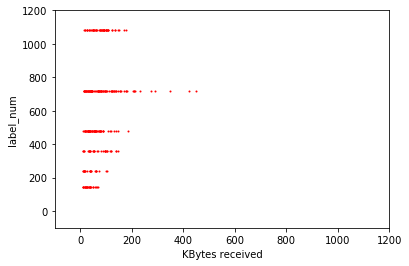

In [0]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(df['KBytesReceived'],df['label_num'],color='red',
           s=1, label='all samples') # ax is the actual figure

# Customize the plot
ax.set(xlim=[-100,1200], ylim=[-100,1200], ylabel="label_num",
      xlabel="KBytes received")

# Save it to the disk
fig.savefig('img/scatter.pdf')

In [0]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
196,6.3,22,43,1792,59856,192.168.1.190,172.217.129.103,QUIC,22,43,...,True,59.856,q480p,480,4.091942,3.135494,3.784190,7.491645,10.999714,0.003879
93,7.0,24,61,3019,79808,192.168.1.190,74.125.155.203,QUIC,17,55,...,True,79.808,q480p,480,4.379624,3.218876,4.127134,8.013012,11.287392,0.007391
259,7.5,18,96,2246,132284,192.168.1.190,173.194.184.107,QUIC,18,96,...,True,132.284,q720p,720,4.884951,2.944439,4.574711,7.717351,11.792714,0.003653
127,8.2,18,24,1794,29471,192.168.1.190,173.194.55.11,QUIC,11,21,...,True,29.471,q720p,720,3.383407,2.944439,3.218876,7.492760,10.291196,0.010024
18,6.0,9,11,2472,14307,192.168.1.190,173.194.184.231,QUIC,5,10,...,True,14.307,q144p,144,2.660749,2.302585,2.484907,7.813187,9.568574,0.003879


Let's split the dataset in 80% training set, 20% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed

In [0]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=19)
df_test.head()

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  204 ; Test samples  88


## Univariate Linear Regression

**Goal**: Predict `label_num` based on `KBytesReceived`

In [0]:
df_train[['KBytesReceived','label_num']]

,KBytesReceived,label_num
211,135.024,1080
261,85.044,1080
150,137.403,480
31,48.720,360
189,86.304,720
141,118.490,360
182,85.040,1080
98,15.387,720
96,79.002,360
174,75.114,1080


Let's separate the independent variables $X$ from the dependent variables $y$

In [0]:
# Scikit learn models expect matrices. We first transform 
# the dataframe into an array
X_train = df_train[['KBytesReceived'] ].values

# Scikit learn models expect matrices with multiple 
# rows and columns as X. X_train has instead just one column
# ==> The following code is necessary
X_train = X_train.reshape(-1,1)

y_train = df_train['label_num'].values


# Do the same for the test dataset
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values

Let's train our first supervised learning model: an Ordinary Least Squares model.

Note: the main library for machine learning in Python is `scikit learn`. However, as for regression, `statsmodel` is better. I prepared the following function with the same interface of `scikit learn` and the additional information of `statsmodel`.

In [0]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=['KBytesReceived'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     15.70
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           0.000103
Time:                        19:28:50   Log-Likelihood:                -1445.2
No. Observations:                 204   AIC:                             2894.
Df Residuals:                     202   BIC:                             2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        519.5636     33.254     15.

Now we have a trained model $h_{\theta*}(\cdot)$ stored in `model`. We can use it to predict new values.

In [0]:
newKBytesReceivedSamples = np.array([257, 524, 613, 223]).reshape(-1,1)


predictedLabels = model.predict(newKBytesReceivedSamples)
predictedLabels

array([ 893.14316416, 1281.2588651 , 1410.63076541,  843.72019101])

To plot the model, we let it predict on an interval

In [0]:
interval = np.arange(-100,1200).reshape(-1,1)
h_values = model.predict(interval)
h_values

array([ 374.20194605,  375.65556291,  377.10917977, ..., 2259.54301016,
       2260.99662702, 2262.45024387])

Let's plot the model. It is constructed so to minimize the distance between the blue points (training samples) and the line

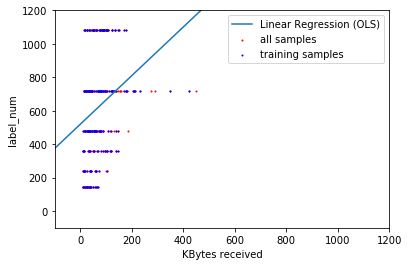

In [0]:
ax.scatter(X_train,y_train,color='blue',s=1, 
           label="training samples")

ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig.savefig('img/QoE-prediction-OLS.pdf')
fig

Let's evaluate the model on the test set

In [0]:
y_pred = model.predict(X_test)

Let us compare the true test labels and the predicted

In [0]:
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
0,720,599.486394
1,720,578.113865
2,720,584.313541
3,1080,651.086885
4,480,609.283771
5,1080,588.236853
6,720,1171.297111
7,480,789.065651
8,720,658.844838
9,144,550.438454


Let's compute the Mean Square Error (MSE)

In [0]:
MSE = mean_squared_error(y_test, y_pred)
MSE

75019.04691479652

The Root MSE is easier to understand, since it is in the same unity of measurement of the target

In [0]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

273.8960512946408

#### Dependency on the training set

If we change the training set, the model changes as well

In [0]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=2)

X_train = df_train[['KBytesReceived'] ].values.reshape(-1,1)
y_train = df_train['label_num'].values
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values


model.fit(X_train, y_train, column_names=['KBytesReceived'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     21.00
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           8.04e-06
Time:                        19:28:50   Log-Likelihood:                -1437.6
No. Observations:                 204   AIC:                             2879.
Df Residuals:                     202   BIC:                             2886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        511.4868     30.856     16.

Note that the coefficients are different. Let's plot it

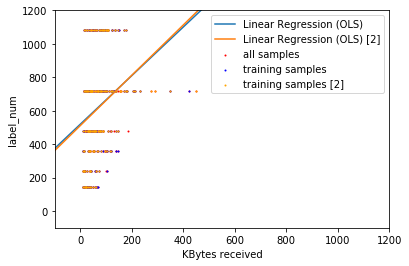

In [0]:
h_values = model.predict(interval)

ax.scatter(X_train,y_train,color='orange',s=1, 
           label="training samples [2]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [2]")
ax.legend()
fig

Let's train again a model on a different training set

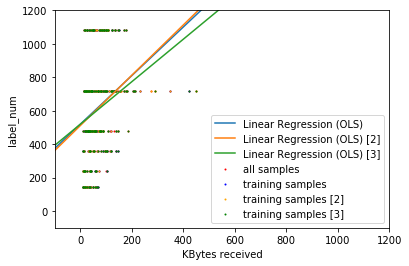

In [0]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)

X_train = df_train[['KBytesReceived'] ].values.reshape(-1,1)
y_train = df_train['label_num'].values
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values


model.fit(X_train, y_train, column_names=['KBytesReceived'])
h_values = model.predict(interval)
ax.scatter(X_train,y_train,color='green',s=1, 
           label="training samples [3]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [3]")
ax.legend()
fig




### Use transformed variables

We observe that the values of `KBytesReceived` are squashed toward small values (we also checked it with a histogram in the last notebook). We have shown in the last notebook that in this case a log transformation can unveil correlation.

We now show that it also improves the model. First, have a look at the plot

[Text(0, 0.5, 'label_num'), Text(0.5, 0, 'KBytesReceived_log')]

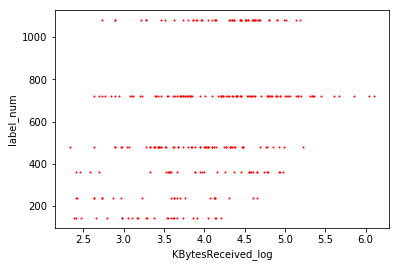

In [0]:
fig, ax = plt.subplots()
ax.scatter(df['KBytesReceived_log'],df['label_num'],color='red',s=1)
ax.set(ylabel="label_num",xlabel="KBytesReceived_log")

Let's train the new model

In [0]:
X_train = df_train[['KBytesReceived_log'] ].values.reshape(-1,1)
X_test = df_test[['KBytesReceived_log'] ].values.reshape(-1,1)

model.fit(X_train, y_train, column_names=['KBytesReceived'])

AndreaLinearRegression(fit_intercept=True)

Let's plot the corresponding line

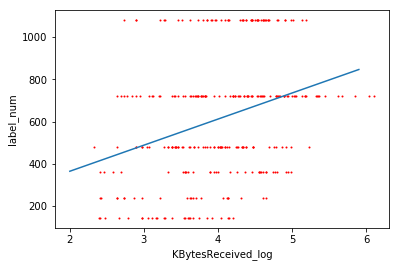

In [0]:
interval = np.arange(2,6,0.1).reshape(-1,1)
h_values = model.predict(interval)
ax.plot(interval, h_values, label="transformed model")
fig

Let's check the test error

In [0]:
y_pred = model.predict(X_test)
RMSE_1_feature = math.sqrt(mean_squared_error(y_test, y_pred) )
RMSE_1_feature

268.55219885344326

Using the logarithmic transformation, we improved the model.

In [0]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.84
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           3.39e-06
Time:                        19:28:51   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        118.3754    104.580      1.

## Multivariate Linear Regression

Can we improve the test loss if we use other features?

Have a first look at the more correlated features (see notebook on data exploration)

In [0]:
corrmatrix = df.corr().round(3)
corr_to_label_num = corrmatrix['label_num']
# We sort based on the absolute value (see https://stackoverflow.com/a/30486411/2110769)
corr_to_label_num.reindex(corr_to_label_num.abs().sort_values(ascending=False).index)

label_num              1.000
EpochTime             -0.408
StartTime             -0.408
PacketsSent            0.384
PacketsSent0           0.363
BytesReceived_log      0.340
KBytesReceived_log     0.340
PacketsReceived_log    0.336
BytesSent0             0.297
BytesReceived          0.264
KBytesReceived         0.264
PacketsSent_log        0.257
PacketsReceived        0.252
BytesSent3            -0.234
BytesSent              0.225
BytesReceived0         0.203
PacketsReceived0       0.199
BytesSent4            -0.182
PacketsSent3          -0.148
PacketsSent1           0.136
PlaybackProgress      -0.133
BytesSent6            -0.130
BytesSent15           -0.122
PacketsSent15         -0.120
PacketsReceived1       0.107
BytesReceived1         0.106
PacketsSent4          -0.105
BufferHealth           0.104
BytesSent1             0.104
BytesReceived5        -0.099
                       ...  
PacketsSent20            NaN
PacketsReceived20        NaN
BytesSent20              NaN
BytesReceived2

Let's add `StartTime` among the regressors

In [0]:
cols = ['KBytesReceived_log', 'StartTime']

# We do not need to reshape(-1,1) this time, as we 
# have a matrix with two columns now.
X_train = df_train[cols ].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.77
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           3.49e-06
Time:                        19:28:51   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0289      0

In [0]:
X_test = df_test[cols ].values
y_pred = model.predict(X_test)

In [0]:
MSE = mean_squared_error(y_test, y_pred)
RMSE_some_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_some_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  268.5379993855423 ; RMSE with one feature:  273.8960512946408


We improved our RMSE by also considering `StartTime` ... BUT ...

**Attention**: The correlation between `StartTime` and the label is __artificial__, just because the experimenter first measured low quality video sessions and then high quality. This would not be true in a real deployment


**DO NOT BE OBSESSED BY REDUCING THE ERROR, AND LOOK AT THE MEANING OF FEATURES!**

Let's add other correlated features

In [0]:
cols=['PacketsSent', 'KBytesReceived_log', 'PacketsReceived_log']

X_train = df_train[cols].values
X_test = df_test[cols].values

In [0]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)

AndreaLinearRegression(fit_intercept=True)

In [0]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.03
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           2.46e-08
Time:                        19:28:51   Log-Likelihood:                -1430.6
No. Observations:                 204   AIC:                             2869.
Df Residuals:                     200   BIC:                             2883.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             297.7369    

In [0]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_few_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_few_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  263.9484263293869 ; RMSE with one feature:  273.8960512946408


We improved a bit

What if we take all the numeric features?

In [0]:
# Trick from https://stackoverflow.com/a/51684628/2110769
cols = df_train.select_dtypes([np.number]).columns
cols

Index(['RelativeTime', 'PacketsSent', 'PacketsReceived', 'BytesSent',
       'BytesReceived', 'PacketsSent0', 'PacketsReceived0', 'BytesSent0',
       'BytesReceived0', 'PacketsSent1',
       ...
       'BufferHealth', 'BufferProgress', 'KBytesReceived', 'label_num',
       'KBytesReceived_log', 'PacketsSent_log', 'PacketsReceived_log',
       'BytesSent_log', 'BytesReceived_log', 'BufferProgress_log'],
      dtype='object', length=140)

To construct our X_train and X_test, we should remove the target `label_num` and the "artificial features".

In [0]:
cols = cols.drop(['label_num', 'StartTime', 'EpochTime' ] )

In [0]:
X_train = df_train[cols].values
X_test = df_test[cols].values

model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.19e-11
Time:                        19:28:51   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
RelativeTime            5.8463    

/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Let's deal with the warnings later. Let's just test the model.

In [0]:
y_pred = model.predict(X_test)
RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE now: ', RMSE_all_features, '; RMSE with some features: ',
      RMSE_some_features)


RMSE now:  1052.5103207215234 ; RMSE with some features:  268.5379993855423


What? We use more features and we obtain a worse model?

## Correct a bad model

Note that no coefficient is significant (look at the p-value). The model is "rubbish".



Remember that
$$
    \boldsymbol{\theta}^* = (X^T X)^{-1} X^T \textbf{y}
$$

Is $X^T X$ invertible?

### Constant features

In [0]:
import feature_engineering # From the course library
help(feature_engineering)


Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
                the name of the target feature
        
        Returns
        --------------
        Series
                A series of features, with the Person's correlation 
                coefficient between them and the target, ordered in decreasing
                oder of correlation
    
    get_most_correlated(df)
        Returns the pairs of features in descending order of Person's 
        correlation
        
        Parameters
        --------------
        df: dataframe
        
        Returns
        -------------
        Series
                the pair of features and the Pearson's coefficient
    
    low_var_features(df, thre

In [0]:
non_constant_features = \
    feature_engineering.low_var_features(df_train[cols], threshold=0)
non_constant_features

['RelativeTime',
 'PacketsSent',
 'PacketsReceived',
 'BytesSent',
 'BytesReceived',
 'PacketsSent0',
 'PacketsReceived0',
 'BytesSent0',
 'BytesReceived0',
 'PacketsSent1',
 'PacketsReceived1',
 'BytesSent1',
 'BytesReceived1',
 'PacketsSent2',
 'PacketsReceived2',
 'BytesSent2',
 'BytesReceived2',
 'PacketsSent3',
 'PacketsReceived3',
 'BytesSent3',
 'BytesReceived3',
 'PacketsSent4',
 'PacketsReceived4',
 'BytesSent4',
 'BytesReceived4',
 'PacketsSent5',
 'PacketsReceived5',
 'BytesSent5',
 'BytesReceived5',
 'PacketsSent6',
 'PacketsReceived6',
 'BytesSent6',
 'BytesReceived6',
 'PacketsSent7',
 'PacketsReceived7',
 'BytesSent7',
 'BytesReceived7',
 'PacketsSent8',
 'PacketsReceived8',
 'BytesSent8',
 'BytesReceived8',
 'PacketsSent9',
 'PacketsReceived9',
 'BytesSent9',
 'BytesReceived9',
 'PacketsSent12',
 'PacketsReceived12',
 'BytesSent12',
 'BytesReceived12',
 'PacketsSent13',
 'PacketsReceived13',
 'BytesSent13',
 'BytesReceived13',
 'PacketsSent15',
 'PacketsReceived15',
 'B

We must only use non-constant features

In [0]:
X_train = df_train[non_constant_features].values
X_test = df_test[non_constant_features].values

model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=non_constant_features)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.19e-11
Time:                        19:28:51   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept            2.281e+07   2

The warnings disappear. Still, coefficients are no significant

In [0]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

RMSE:  1145.0099952070225


As expected, the performance is bad.

### Collinearity

Let's check the most correlated features

In [0]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train[non_constant_features])
most_corr_feats

PacketsReceived12    BytesReceived12        1.000
PacketsReceived13    BytesReceived13        1.000
BufferProgress       BufferProgress_log     1.000
BytesReceived        KBytesReceived         1.000
PacketsReceived8     BytesReceived8         1.000
KBytesReceived_log   BytesReceived_log      1.000
PacketsReceived15    BytesReceived15        1.000
PacketsSent25        BytesSent25            0.999
PacketsReceived0     BytesReceived0         0.999
PacketsSent13        PacketsReceived13      0.998
                     BytesReceived13        0.998
PacketsReceived25    BytesReceived25        0.997
PacketsReceived1     BytesReceived1         0.997
PacketsSent13        BytesSent13            0.996
PacketsSent8         BytesSent8             0.995
PacketsReceived2     BytesReceived2         0.994
PacketsReceived      KBytesReceived         0.993
                     BytesReceived          0.993
PacketsSent15        BytesSent15            0.992
PacketsReceived13    BytesSent13            0.989


As expected, packets received/set and bytes received/set are highly correlated. Also the variables transformed to log are correlated with the original ones. We can remove the original ones. If we have KBytes, we can remove Bytes

In [0]:
to_remove = ['PacketsReceived8',
        'PacketsReceived15', 'PacketsReceived13',
          'BytesReceived','BytesReceived_log','BufferProgress',
          'PacketsReceived0', 'PacketsSent25', 'PacketsReceived25'
            ]

# Take from non_constant_features all the features except the ones in
# to_remove
cols_1 = []
for feat in non_constant_features:
    if feat not in to_remove:
        cols_1.append(feat)
        
        
X_train = df_train[cols_1].values
X_test = df_test[cols_1].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols_1)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.674
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.65e-10
Time:                        19:28:51   Log-Likelihood:                -1360.8
No. Observations:                 204   AIC:                             2836.
Df Residuals:                     147   BIC:                             3025.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             540.6574    

In [0]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  489.05947122317014 ; RMSE with one feature:  273.8960512946408


After removing the most correlated features, the model improved a bit. Still, the model with one feature only is better.

Let's check the correlation among the remaining features.

In [0]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_1])
most_corr_feats

PacketsReceived12   BytesReceived12        1.000
PacketsSent13       BytesReceived13        0.998
PacketsReceived1    BytesReceived1         0.997
PacketsSent13       BytesSent13            0.996
PacketsSent8        BytesSent8             0.995
PacketsReceived2    BytesReceived2         0.994
PacketsReceived     KBytesReceived         0.993
PacketsSent15       BytesSent15            0.992
BytesSent13         BytesReceived13        0.989
PacketsReceived12   BytesSent12            0.988
BytesSent12         BytesReceived12        0.988
PacketsSent8        BytesReceived8         0.988
KBytesReceived_log  PacketsReceived_log    0.987
PacketsSent12       BytesSent12            0.986
BytesSent8          BytesReceived8         0.985
PacketsReceived4    BytesReceived4         0.981
PacketsSent1        BytesSent1             0.979
PacketsSent0        BytesSent0             0.975
PacketsReceived3    BytesReceived3         0.967
PacketsSent1        PacketsReceived1       0.963
PacketsSent15       

Let's remove all the features regarding Packets (as they are highly correlated with Bytes). Still, preserve the ones that have high correlation with the target.

In [0]:
feature_engineering.get_features_correlated_to_target(
                    df_train[cols_1+['label_num']], 'label_num')

label_num              1.00
PacketsSent            0.40
PacketsSent0           0.37
PacketsReceived_log    0.32
KBytesReceived_log     0.32
PacketsSent_log        0.30
BytesSent0             0.30
KBytesReceived         0.26
PacketsReceived        0.25
BytesSent3            -0.25
BytesSent              0.24
BytesReceived0         0.19
PacketsSent3          -0.18
BytesSent4            -0.16
PacketsReceived1       0.15
BytesReceived1         0.15
BytesSent15           -0.14
PacketsSent1           0.14
PlaybackProgress      -0.14
PacketsSent15         -0.13
BytesSent1             0.12
BytesReceived5        -0.12
BytesSent6            -0.12
BytesReceived15       -0.11
BytesSent7            -0.10
BufferProgress_log     0.09
RelativeTime           0.09
BufferHealth           0.08
PacketsSent4          -0.08
PacketsReceived5      -0.08
                       ... 
PacketsReceived6       0.07
BytesSent8            -0.06
BytesReceived8        -0.06
PacketsReceived3      -0.06
PacketsSent12       

In [0]:
to_preserve = ['PacketsSent','PacketsSent0','PacketsReceived_log',
               'PacketsSent_log'
]

cols_2 = []
for feat in cols_1:
    if 'Packets' not in feat:
        cols_2.append(feat)
        
cols_2 = cols_2 + to_preserve

In [0]:
X_train = df_train[cols_2].values
X_test = df_test[cols_2].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols_2)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     4.747
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           6.44e-13
Time:                        19:28:52   Log-Likelihood:                -1371.3
No. Observations:                 204   AIC:                             2825.
Df Residuals:                     163   BIC:                             2961.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             525.5257    

The significance of some features is reinforced, but in general significance is weak.

In [0]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  6714.577335488012 ; RMSE with one feature:  273.8960512946408


Performance is still bad. Let's remove other highly correlated features.

In [0]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_2])
most_corr_feats

BytesSent13         BytesReceived13        0.989
BytesSent12         BytesReceived12        0.988
KBytesReceived_log  PacketsReceived_log    0.987
BytesSent8          BytesReceived8         0.985
BytesSent0          PacketsSent0           0.975
BytesSent           PacketsSent            0.936
PacketsSent         PacketsSent0           0.909
BufferHealth        BufferProgress_log     0.901
BytesSent15         BytesReceived15        0.901
BytesSent1          BytesReceived1         0.891
BytesSent_log       PacketsSent_log        0.891
BytesSent0          PacketsSent            0.886
KBytesReceived      PacketsReceived_log    0.878
                    KBytesReceived_log     0.870
BytesSent0          BytesReceived0         0.860
BytesSent9          BytesReceived13        0.858
BytesSent           BytesSent0             0.853
BytesSent9          BytesSent13            0.848
BytesReceived0      PacketsSent0           0.843
BytesSent           PacketsSent0           0.823
BytesSent2          

In [0]:
to_remove = ['BytesReceived13','BytesReceived12','PacketsReceived_log',
             'BytesReceived8','PacketsSent0','PacketsSent',
             'BufferProgress_log','BytesReceived15','BytesReceived1',
             'PacketsSent_log','PacketsSent', 'KBytesReceived'
            ]

cols_3 = []
for feat in cols_2:
    if feat not in to_remove:
        cols_3.append(feat)
        
X_train = df_train[cols_3].values
X_test = df_test[cols_3].values
model = AndreaLinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  252.00084651697878 ; RMSE with one feature:  273.8960512946408


We finally have a model that seems better than the initial univariate one!

# Cross-validation

Are we sure the model with these 3 features is the best? Or the good results just depend on the training/test set split?

In [0]:
X = df[cols_3].values
y = df['label_num'].values


k_fold = KFold(n_splits=5, shuffle=True, random_state=6)
scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
scores

array([-175867.83786347,  -56056.92564973, -115670.09288593,
       -441516.67482338, -412723.78175341])

In [0]:
mse_vector = -scores
mse_vector

array([175867.83786347,  56056.92564973, 115670.09288593, 441516.67482338,
       412723.78175341])

In [0]:
avg_mse = mean(mse_vector)
avg_mse

240367.0625951853

In [0]:
math.sqrt(avg_mse)

490.27243711551364

Let's try with one feature only

In [0]:
X = df['KBytesReceived_log'].values.reshape(-1,1)



scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
math.sqrt( mean(-scores) )

278.0436795473229

Cross validation tells us that the univariate model is actually the best

# Not important

We store `cols_3` as it will be used in another notebook. 

`pickle` allows to serialize any python object to the hard disk.

In [0]:
filename = mydatasets_folder +'/video-qoe-processed/cols_3.pkl'
outfile = open(filename,'wb')
pickle.dump(cols_3,outfile)
outfile.close()